# Explorando Sistemas Cuánticos con Python

### Una demostración de la librería `numerov`

Este notebook demuestra cómo utilizar la librería `numerov` para resolver la ecuación de Schrödinger para dos sistemas fundamentales en la física cuántica:

1.  **El Oscilador Armónico Cuántico**
2.  **El Átomo de Hidrógeno**

El objetivo es mostrar la simplicidad con la que los estudiantes pueden obtener soluciones numéricas y visualizaciones de alta calidad, promoviendo una comprensión más profunda de los conceptos cuánticos.

In [2]:
# =================================================================
# Importaciones
# =================================================================

# Import functions from your custom local library
from src.numerov.numerov import solve_atom, harmonic_oscillator

# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt

print("✅ Modules imported successfully from the src directory!")

✅ Modules imported successfully from the src directory!


## Paso 1: Encapsulando la Lógica de Visualización

Para hacer el uso de la librería lo más simple posible, creamos funciones de alto nivel. Estas funciones se encargan de:
1.  Llamar al solver de `numerov` con los parámetros deseados.
2.  Procesar los datos de la función de onda resultante.
3.  Generar una gráfica clara y bien etiquetada.
4.  Imprimir una comparación entre la energía calculada y la teórica.

Este es el núcleo de la "guía para el salón de clases": abstraer la complejidad para centrarse en la física.

In [3]:
# =================================================================
# Definición de Funciones para Graficar
# =================================================================

def graficar_oscilador_armonico(estados=[0, 1, 2, 5], xmax=10.0, mesh=1000):
    """
    Resuelve y grafica múltiples estados del Oscilador Armónico Cuántico.
    """
    plt.figure(figsize=(12, 8))
    print("--- Calculando Oscilador Armónico ---")
    
    for n in estados:
        energia, _, psi = harmonic_oscillator(nodes=n, xmax=xmax, mesh=mesh)
        energia_teorica = n + 0.5
        
        #print(f"  Estado n={n}: E_calc = {energia:.5f} | E_teorica = {energia_teorica:.5f}")
        
        x = np.linspace(0, xmax, mesh + 1)
        full_x = np.concatenate((-x[:0:-1], x))
        full_psi = np.concatenate((psi[:0:-1] if n % 2 == 0 else -psi[:0:-1], psi))
        
        plt.plot(full_x, full_psi + energia, label=f'$n={n}, E={energia:.4f}$ Hartree')
        
    plt.title('Funciones de Onda del Oscilador Armónico Cuántico', fontsize=16)
    plt.xlabel('$x$ (Posición en a.u.)', fontsize=12)
    plt.ylabel('$\\psi(x)$ + Energía (desplazamiento vertical)', fontsize=12)
    plt.legend()
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.show()


def graficar_atomo_hidrogeno(estados=[(1, 0), (2, 0), (2, 1), (3, 2)], rmax=50.0, mesh=2000):
    """
    Resuelve y grafica las funciones de onda radiales para el Átomo de Hidrógeno.
    """
    plt.figure(figsize=(12, 8))
    print("\n--- Calculando Átomo de Hidrógeno ---")

    # Función auxiliar para recrear la malla de 'r'
    def init_mesh_r(rmax, mesh, Z=1, xmin=-8.0):
        xmax = np.log(rmax * Z)
        x, _ = np.linspace(xmin, xmax, mesh + 1, retstep=True)
        return np.exp(x) / Z
        
    for n, l in estados:
        energia, _, u_r = solve_atom(n=n, l=l, Z=1, rmax=rmax, mesh=mesh)
        energia_teorica = -1.0 / (2 * n**2)
        
        print(f"  Estado (n={n}, l={l}): E_calc = {energia:.5f} | E_teorica = {energia_teorica:.5f}")
        
        r_mesh = init_mesh_r(rmax, mesh)
        R_r = u_r / r_mesh # Convertimos u(r) = r*R(r) a R(r)
        
        plt.plot(r_mesh, R_r, label=f'$R_{{{n},{l}}}(r)$, $E={energia:.4f}$ Hartree')

    plt.title('Funciones de Onda Radiales del Átomo de Hidrógeno', fontsize=16)
    plt.xlabel('$r$ (Radio en Unidades Atómicas - Bohr)', fontsize=12)
    plt.ylabel('Función de Onda Radial $R(r)$', fontsize=12)
    plt.legend()
    plt.xlim(0, 40)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.show()


print("✅ Funciones de visualización listas para usar.")

✅ Funciones de visualización listas para usar.


## Paso 2: ¡Generar los Resultados!

Ahora, con todo preparado, la "magia" ocurre en una sola celda. Simplemente llamamos a las funciones que definimos anteriormente.

Esta es la experiencia que se busca para el estudiante: una vez que la herramienta está configurada, explorar la física cuántica se reduce a una simple llamada de función. Se pueden cambiar los estados a calcular, el rango de la simulación y observar los resultados de inmediato. 🔬

--- Calculando Oscilador Armónico ---


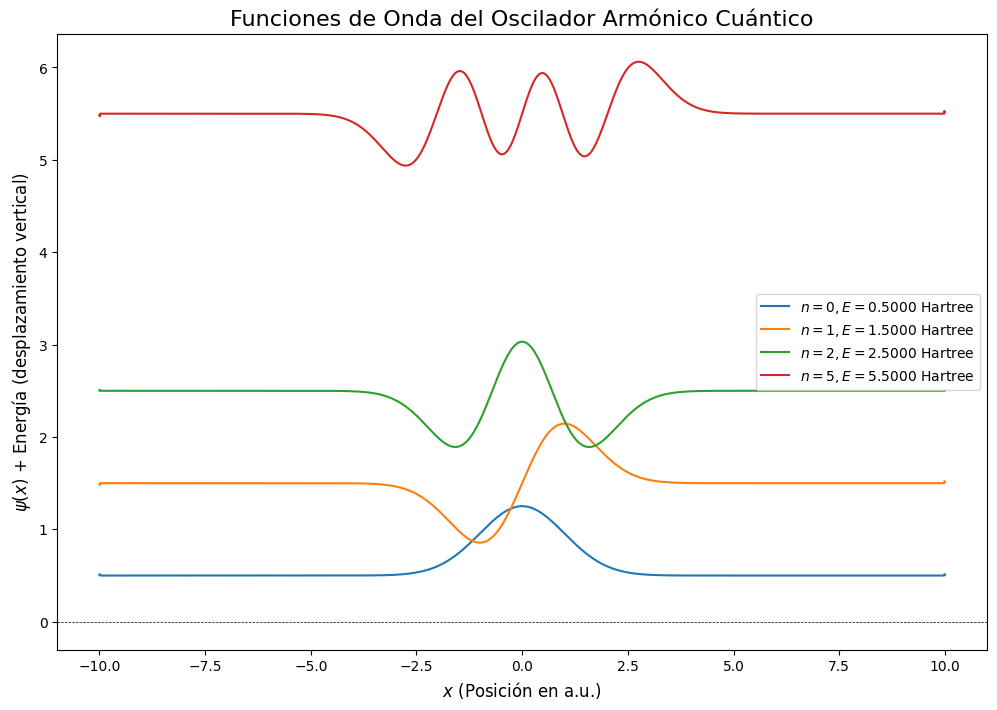

In [4]:
# =================================================================
# Corre esta celda para generar todos los gráficos.
# =================================================================

# 1. Generar la gráfica del Oscilador Armónico
graficar_oscilador_armonico()

# 2. Generar la gráfica del Átomo de Hidrógeno
# graficar_atomo_hidrogeno()